In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (only once)
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('train_tweet.csv')  # make sure your file has a 'text' or 'tweet' column
print(df.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [4]:
sia = SentimentIntensityAnalyzer()

In [5]:
# Apply VADER sentiment scoring to each tweet
df['sentiment_score'] = df['tweet'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify as positive, negative, or neutral
def get_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

# Show results
df[['tweet', 'sentiment_score', 'sentiment']].head()


,tweet,sentiment_score,sentiment
0,@user when a father is dysfunctional and is s...,-0.8296,negative
1,@user @user thanks for #lyft credit i can't us...,0.6705,positive
2,bihday your majesty,0.0000,neutral
3,#model i love u take with u all the time in ...,0.7249,positive
4,factsguide: society now #motivation,0.0000,neutral


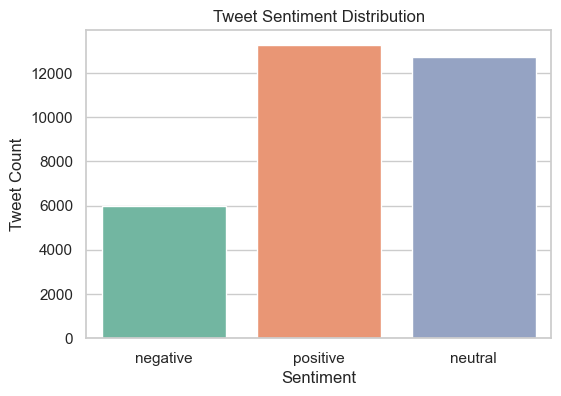

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()